In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
import numpy as np
from matrixprofile import stomp, plot, core
from matrixprofile.stomp_parallel import stomp_parallel
import stumpy
from matplotlib import pyplot as plt

%matplotlib inline

In [90]:
ts = np.loadtxt("matrixprofile-ts-redesign/docs/examples/rawdata.csv", skiprows=1)
w = 32

In [328]:
profile = stomp(ts, w)

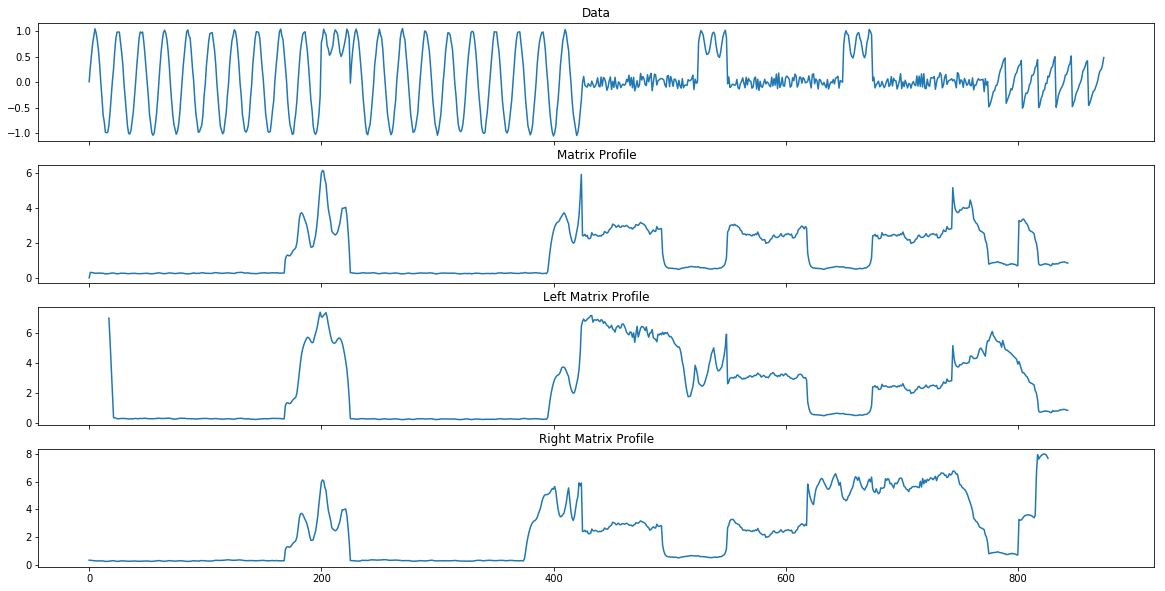

In [329]:
plot.plot(profile, ts)

In [336]:
parallel_result = stomp_parallel(ts, w, n_jobs=4)

Multiprocessing with 4 cpus.


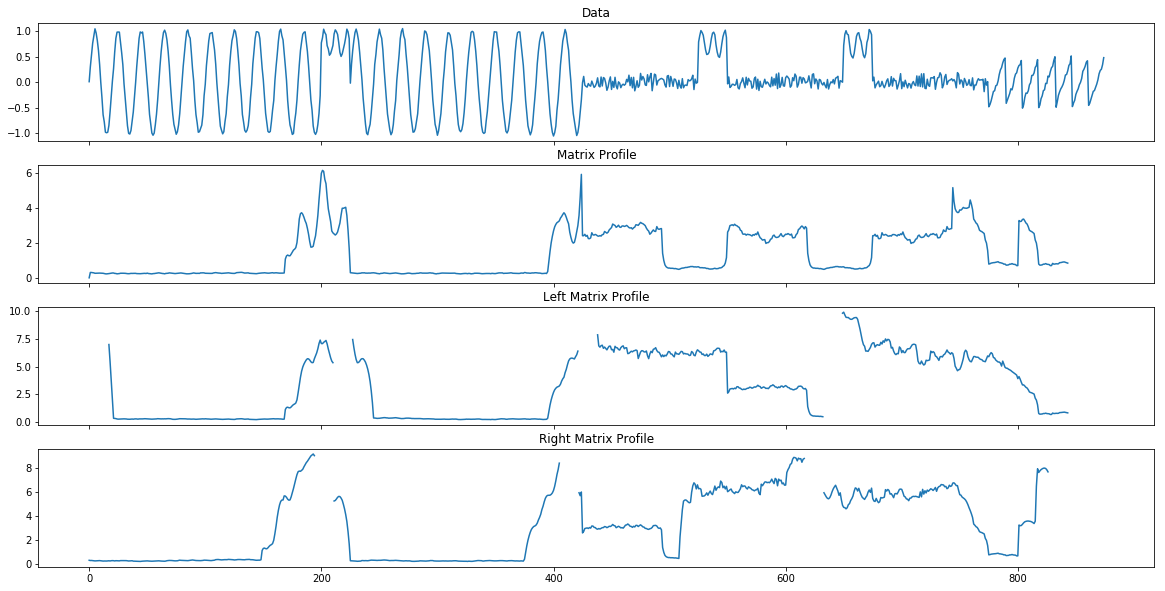

In [337]:
plot.plot(parallel_result, data=ts)

In [338]:
np.testing.assert_almost_equal(profile['mp'], parallel_result['mp'])

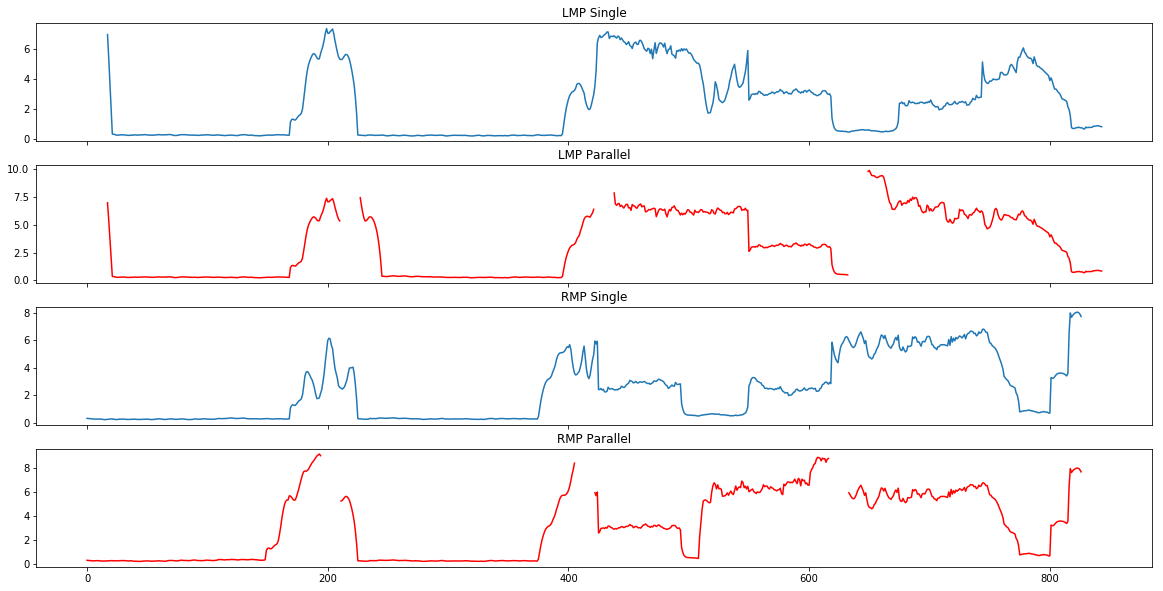

In [339]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(20,10))
current = 0

lmp = profile['lmp']
mp_adj = np.append(lmp, np.zeros(w - 1) + np.nan)
axes[current].plot(np.arange(len(mp_adj)), mp_adj)
axes[current].set_title('LMP Single')
current += 1

lmp = parallel_result['lmp']
mp_adj = np.append(lmp, np.zeros(w - 1) + np.nan)
axes[current].plot(np.arange(len(mp_adj)), mp_adj, c='r')
axes[current].set_title('LMP Parallel')
current += 1

rmp = profile['rmp']
mp_adj = np.append(rmp, np.zeros(w - 1) + np.nan)
axes[current].plot(np.arange(len(mp_adj)), mp_adj)
axes[current].set_title('RMP Single')
current += 1

rmp = parallel_result['rmp']
mp_adj = np.append(rmp, np.zeros(w - 1) + np.nan)
axes[current].plot(np.arange(len(mp_adj)), mp_adj, c='r')
axes[current].set_title('RMP Parallel')
current += 1